## Investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

### Following the instructions on @fedhere's GitHub - [Assigment3_instructions](https://github.com/fedhere/PUI2017_fb55/blob/master/HW5_fb55/Assignment3_instructionsUpdated.ipynb).

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import statsmodels.formula.api as smf
import seaborn as sns
sns.set_style('whitegrid')

try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv')
df.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [3]:
df.drop(['ISO code', 'Source', '% of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people'], axis=1, inplace=True)
df = df.rename(columns={"Country/Territory": "Country"})
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [4]:
url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%2F100%20inhabitants%2CNumber%20of%20mass%20shootings%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABeligium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
try:
    response = urllib.urlopen(url)
    df2 = pd.read_csv(response)
except urllib.HTTPError:
    print('Invalid URL!!!')
    
df2.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [5]:
df3 = pd.read_csv('https://raw.githubusercontent.com/unissechua/PUI2017_uc288/master/HW5_uc288/data/POP.csv', skiprows=[0,1,2,3])
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [6]:
df3.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2013', '2014',
       '2015', '2016', 'Unnamed: 61'], axis=1, inplace=True)
df3 = df3.rename(columns={"2012": "pop"})
df3.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [7]:
df4 = pd.read_csv('https://raw.githubusercontent.com/unissechua/PUI2017_uc288/master/HW5_uc288/data/GDP.csv', skiprows=[0,1,2,3])
df4.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [8]:
df4.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2013', '2014',
       '2015', '2016', 'Unnamed: 61'], axis=1, inplace=True)
df4 = df4.rename(columns={"2012": "gdp"})
df4.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [9]:
df3 = df3.merge(df4, right_on="Country Name", left_on="Country Name")
df3.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153984e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [10]:
df3 = df3.rename(columns={"Country Name": "Country"})
df3.head()

,Country,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153984e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [11]:
df = df.merge(df3, on="Country")
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp
0,Albania,56.0,270000.0,2900401.0,1.231978e+10
1,Algeria,20.0,1900000.0,37565847.0,2.090474e+11
2,Angola,NaN,2800000.0,25096150.0,1.153984e+11
3,Argentina,1198.0,3950000.0,42096739.0,5.459824e+11
4,Armenia,9.0,380000.0,2881922.0,1.061932e+10


In [12]:
df = df.merge(df2, on="Country")
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings
0,Australia,30.0,3050000.0,22728254.0,1.538194e+12,15.0,4
1,Austria,18.0,2500000.0,8429991.0,4.074516e+11,30.4,1
2,Canada,173.0,9950000.0,34750545.0,1.824289e+12,30.8,4
3,Denmark,15.0,650000.0,5591572.0,3.271489e+11,12.0,0
4,Finland,24.0,2400000.0,5413971.0,2.567065e+11,45.3,2


In [13]:
len(df)

22

# Exploration

## Plot mass shooting vs GDP in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


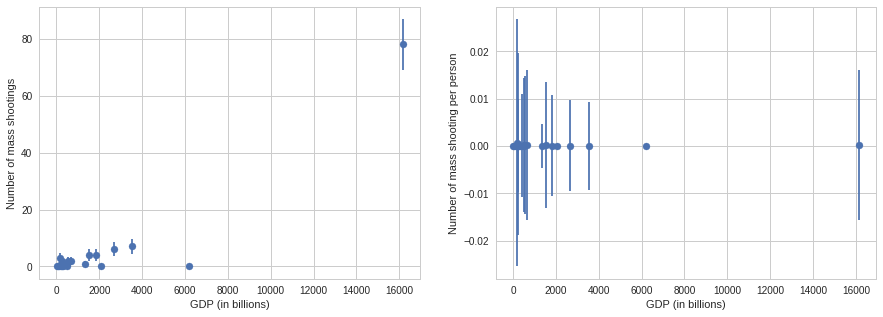

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [46]:
fig = pl.figure(figsize=(15,5)) 
ax1 = fig.add_subplot(121)

# plot mass shootings vs GDP in absolute numbers
scatter1 = ax1.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax1.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax1.set_xlabel("GDP (in billions)")
ax1.set_ylabel("Number of mass shootings")
ax1.set_ylim()

ax2 = fig.add_subplot(122)

df['shootingspp'] = df["Number of mass shootings"] / df['pop'] * 1e3

# plot mass shootings vs GDP in absolute numbers
scatter2 = ax2.scatter(df.gdp / 1e9, df['shootingspp'])
ax2.errorbar(df.gdp / 1e9, df['shootingspp'], 
            yerr = np.sqrt(df['shootingspp'] * 1.0), fmt = '.')
ax2.set_xlabel("GDP (in billions)")
ax2.set_ylabel("Number of mass shooting per person")
ax2.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

## Plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

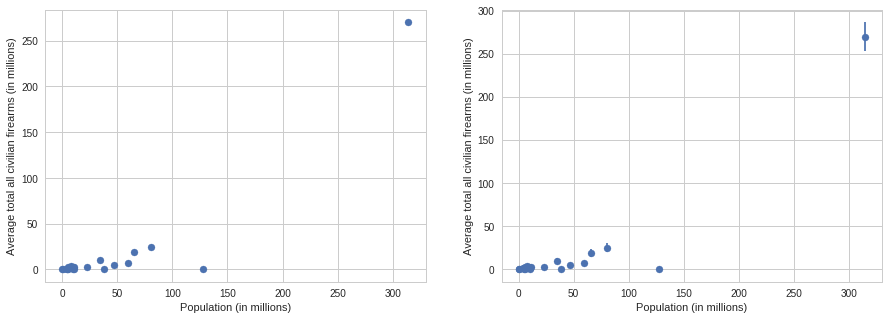

In [55]:
fig = pl.figure(figsize=(15,5)) 
ax1 = fig.add_subplot(121)

scatter1 = ax1.scatter(df['pop'] / 1e6, df['Average total all civilian firearms'] / 1e6)
ax1.set_xlabel("Population (in millions)")
ax1.set_ylabel("Average total all civilian firearms (in millions)")
ax1.set_ylim();

ax2 = fig.add_subplot(122)

scatter2 = ax2.scatter(df['pop'] / 1e6, df['Average total all civilian firearms'] / 1e6)
ax2.errorbar(df['pop'] / 1e6, df['Average total all civilian firearms'] / 1e6, 
            yerr = np.sqrt(df['Average total all civilian firearms'] / 1e6 * 1.0), fmt = '.')
ax2.set_xlabel("Population (in millions)")
ax2.set_ylabel("Average total all civilian firearms (in millions)")
ax2.set_ylim();

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

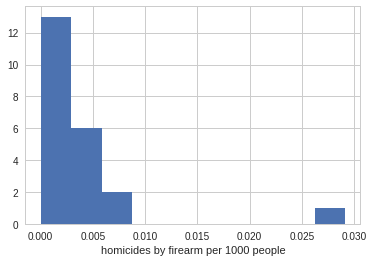

In [48]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

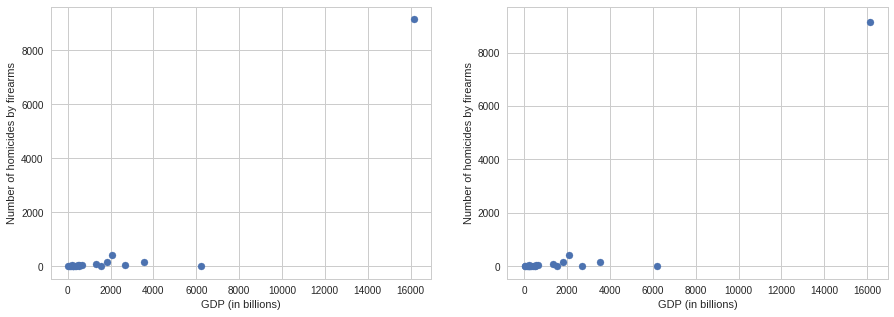

In [52]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
scatter1 = ax1.scatter(df['gdp'] / 1e9, df['Number of homicides by firearm'])
ax1.set_xlabel("GDP (in billions)")
ax1.set_ylabel("Number of homicides by firearms")
ax1.set_ylim()

ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(df['gdp'] / 1e9, df['Number of homicides by firearm'])
ax2.errorbar(df['gdp'] / 1e9, df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm'] * 1.0), fmt = '.')
ax2.set_xlabel("GDP (in billions)")
ax2.set_ylabel("Number of homicides by firearms")
ax2.set_ylim();

## Plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [69]:
df_usa = df[df['Country'] == 'United States']
df_usa

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings,shootingspp
21,United States,9146.0,270000000.0,313998379.0,1.615526e+13,88.8,78,0.000248


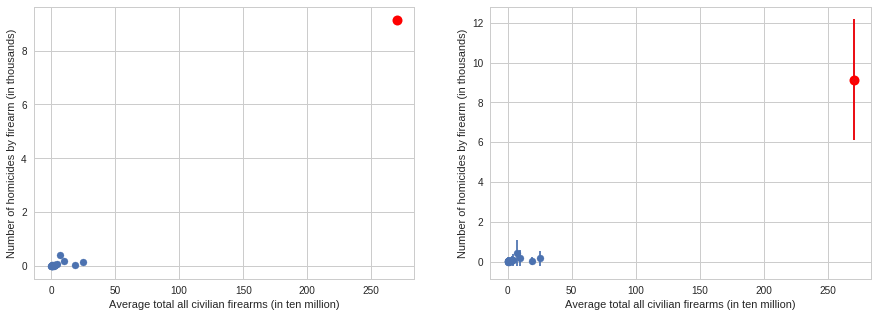

In [85]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of homicides by firearm'] / 1e3)
ax1.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of homicides by firearm'] / 1e3, 'ro', markersize=10)
ax1.set_xlabel('Average total all civilian firearms (in ten million)')
ax1.set_ylabel('Number of homicides by firearm (in thousands)')
ax1.set_ylim();

ax2 = fig.add_subplot(122)
ax2.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of homicides by firearm'] / 1e3)
ax2.errorbar(df['Average total all civilian firearms'] / 1e6 , df['Number of homicides by firearm'] / 1e3,
            yerr=np.sqrt(df['Number of homicides by firearm'] / 1e3 * 1.0), fmt='.')
ax2.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of homicides by firearm'] / 1e3, 'ro', markersize=10)
ax2.errorbar(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of homicides by firearm'] / 1e3,
            yerr=np.sqrt(df_usa['Number of homicides by firearm'] / 1e3 * 1.0), fmt='.', color='r')
ax2.set_xlabel('Average total all civilian firearms (in ten million)')
ax2.set_ylabel('Number of homicides by firearm (in thousands)')
ax2.set_ylim();

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


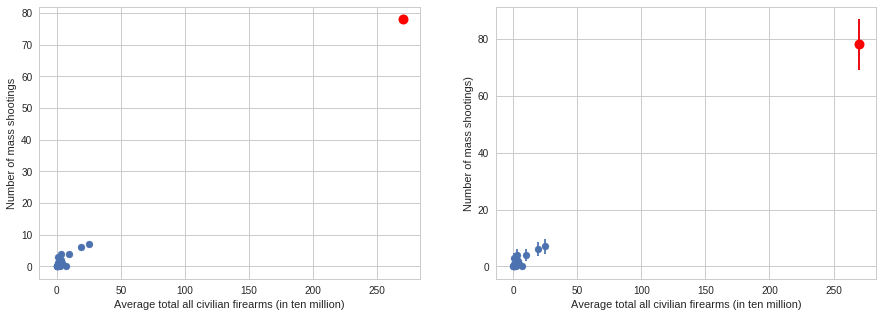

In [88]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of mass shootings'])
ax1.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of mass shootings'], 'ro', markersize=10)
ax1.set_xlabel('Average total all civilian firearms (in ten million)')
ax1.set_ylabel('Number of mass shootings')
ax1.set_ylim();

ax2 = fig.add_subplot(122)
ax2.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of mass shootings'])
ax2.errorbar(df['Average total all civilian firearms'] / 1e6 , df['Number of mass shootings'],
            yerr=np.sqrt(df['Number of mass shootings'] * 1.0), fmt='.')
ax2.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of mass shootings'], 'ro', markersize=10)
ax2.errorbar(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of mass shootings'],
            yerr=np.sqrt(df_usa['Number of mass shootings'] * 1.0), fmt='.', color='r')
ax2.set_xlabel('Average total all civilian firearms (in ten million)')
ax2.set_ylabel('Number of mass shootings')
ax2.set_ylim();

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [95]:
df['firearmspp'] = df['Average total all civilian firearms'] / df['pop']
df

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings,shootingspp,firearmspp
0,Australia,30.0,3050000.0,22728254.0,1.538194e+12,15.0,4,0.000176,0.134194
1,Austria,18.0,2500000.0,8429991.0,4.074516e+11,30.4,1,0.000119,0.296560
2,Canada,173.0,9950000.0,34750545.0,1.824289e+12,30.8,4,0.000115,0.286326
3,Denmark,15.0,650000.0,5591572.0,3.271489e+11,12.0,0,0.000000,0.116246
4,Finland,24.0,2400000.0,5413971.0,2.567065e+11,45.3,2,0.000369,0.443298
5,France,35.0,19000000.0,65659790.0,2.681416e+12,31.2,6,0.000091,0.289370
6,Germany,158.0,25000000.0,80425823.0,3.543984e+12,30.3,7,0.000087,0.310845
7,Greece,29.0,2500000.0,11045011.0,2.456707e+11,22.5,0,0.000000,0.226347
8,Hungary,7.0,560000.0,9920362.0,1.273211e+11,5.5,0,0.000000,0.056450
9,Iceland,0.0,90000.0,320716.0,1.421858e+10,30.3,0,0.000000,0.280622


In [104]:
lm = smf.ols(formula='shootingspp ~ firearmspp', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Mon, 16 Oct 2017   Prob (F-statistic):             0.0374
Time:                        20:13:53   Log-Likelihood:                 163.40
No. Observations:                  22   AIC:                            -322.8
Df Residuals:                      20   BIC:                            -320.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.149e-05   5.15e-05      0.612      0.548     -7.59e-05     0.000
firearmspp     0.0004      0.000      2.230      0.037      2.52e-05     0.001
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

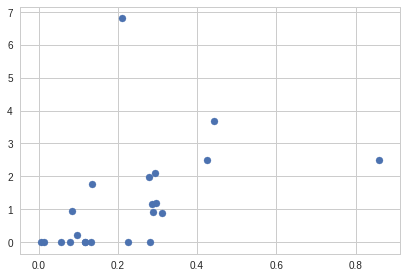

In [99]:
fig = pl.figure(figsize(15,10))

ax1 = fig.add_subplot(221)
ax1.scatter(df['firearmspp'], df['shootingspp'] * 1e4)

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [20]:
from IPython.display import Image
Image(url="https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/confidence_intervals_regression.png", embed=True)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
pl.figure()
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [ ]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings